## 1. Import libraries and load the dataset

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [40]:
df = pd.read_csv('./USDT.csv')
df1 = df.reset_index()['Price']

In [41]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

## 2. Split the data into training, test and validate  sets

In [42]:
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (606, 1)
Validate shape: (204, 1)


In [43]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1416, 1)
Test shape: (404, 1)
Validate shape: (203, 1)


In [44]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1213, 1)
Test shape: (404, 1)
Validate shape: (406, 1)


In [45]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [46]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [47]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

## 3. Perform GRU Model

### 3.1 Build the GRU Model and fit train data into Model

In [48]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
18/18 [==============================] - 4s 84ms/step - loss: 0.1709 - val_loss: 0.0110
Epoch 2/200
18/18 [==============================] - 1s 53ms/step - loss: 0.0100 - val_loss: 0.0049
Epoch 3/200
18/18 [==============================] - 1s 56ms/step - loss: 0.0017 - val_loss: 0.0024
Epoch 4/200
18/18 [==============================] - 1s 47ms/step - loss: 2.7961e-04 - val_loss: 0.0024
Epoch 5/200
18/18 [==============================] - 1s 48ms/step - loss: 1.0548e-04 - val_loss: 0.0023
Epoch 6/200
18/18 [==============================] - 1s 48ms/step - loss: 8.2096e-05 - val_loss: 0.0023
Epoch 7/200
18/18 [==============================] - 1s 48ms/step - loss: 7.8670e-05 - val_loss: 0.0023
Epoch 8/200
18/18 [==============================] - 1s 55ms/step - loss: 7.8347e-05 - val_loss: 0.0023
Epoch 9/200
18/18 [==============================] - 1s 52ms/step - loss: 7.8197e-05 - val_loss: 0.0023
Epoch 10/200
18/18 [==============================] - 1s 54ms/step - loss: 7

18/18 [==============================] - 1s 57ms/step - loss: 7.1216e-05 - val_loss: 0.0019
Epoch 80/200
18/18 [==============================] - 1s 59ms/step - loss: 7.3394e-05 - val_loss: 0.0019
Epoch 81/200
18/18 [==============================] - 1s 60ms/step - loss: 7.0131e-05 - val_loss: 0.0019
Epoch 82/200
18/18 [==============================] - 1s 62ms/step - loss: 6.9923e-05 - val_loss: 0.0019
Epoch 83/200
18/18 [==============================] - 1s 66ms/step - loss: 6.8516e-05 - val_loss: 0.0018
Epoch 84/200
18/18 [==============================] - 1s 63ms/step - loss: 6.8678e-05 - val_loss: 0.0018
Epoch 85/200
18/18 [==============================] - 1s 60ms/step - loss: 7.0029e-05 - val_loss: 0.0018
Epoch 86/200
18/18 [==============================] - 1s 61ms/step - loss: 7.0725e-05 - val_loss: 0.0019
Epoch 87/200
18/18 [==============================] - 1s 58ms/step - loss: 7.1220e-05 - val_loss: 0.0018
Epoch 88/200
18/18 [==============================] - 1s 56ms/step -

18/18 [==============================] - 1s 55ms/step - loss: 6.2746e-05 - val_loss: 0.0016
Epoch 157/200
18/18 [==============================] - 1s 54ms/step - loss: 6.1134e-05 - val_loss: 0.0016
Epoch 158/200
18/18 [==============================] - 1s 53ms/step - loss: 6.4213e-05 - val_loss: 0.0016
Epoch 159/200
18/18 [==============================] - 1s 52ms/step - loss: 6.3047e-05 - val_loss: 0.0016
Epoch 160/200
18/18 [==============================] - 1s 49ms/step - loss: 6.2435e-05 - val_loss: 0.0016
Epoch 161/200
18/18 [==============================] - 1s 53ms/step - loss: 6.1564e-05 - val_loss: 0.0016
Epoch 162/200
18/18 [==============================] - 1s 50ms/step - loss: 6.2153e-05 - val_loss: 0.0016
Epoch 163/200
18/18 [==============================] - 1s 54ms/step - loss: 6.4407e-05 - val_loss: 0.0016
Epoch 164/200
18/18 [==============================] - 1s 54ms/step - loss: 6.3878e-05 - val_loss: 0.0016
Epoch 165/200
18/18 [==============================] - 1s 55

In [50]:
def evaluate_gru_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [51]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_gru_model(yval, X_val)

10/10 [==============================] - 1s 12ms/step


### 3.3 Evaluate on Test data

In [52]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_gru_model(ytest, X_test)

10/10 [==============================] - 0s 12ms/step


In [53]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

35/35 [==============================] - 1s 14ms/step


### 3.4 Predict price for the next 30 days

In [55]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=345
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.45214106 0.4697733  0.45969773 0.49370277 0.50881612 0.51259446
 0.51511335 0.5163728  0.54911839 0.48992443 0.51133501 0.52141058
 0.53904282 0.45843829 0.50503778 0.49748111 0.3627204  0.34256927
 0.35264484 0.34508816 0.28967254 0.30352645 0.29219144 0.33501259
 0.17884131 0.08942065 0.0465995  0.07934509 0.32367758 0.37405542
 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839
 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113 0.5604534
 0.58312343 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179
 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081
 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957
 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068
 0.59949622 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567
 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013
 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292
 0.62720403 0.64609572 0.6209068  0.61335013 0.63602

2 day output [[0.65736043]]
3 day input [0.49370277 0.50881612 0.51259446 0.51511335 0.5163728  0.54911839
 0.48992443 0.51133501 0.52141058 0.53904282 0.45843829 0.50503778
 0.49748111 0.3627204  0.34256927 0.35264484 0.34508816 0.28967254
 0.30352645 0.29219144 0.33501259 0.17884131 0.08942065 0.0465995
 0.07934509 0.32367758 0.37405542 0.39168766 0.40302267 0.4093199
 0.48992443 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005
 0.54534005 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567
 0.59319899 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401
 0.60201511 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068
 0.62216625 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788
 0.60075567 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343
 0.60327456 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345
 0.60453401 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514
 0.61838791 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068
 0.61335013 0.63602015 0.6

6 day output [[0.64890707]]
7 day input [0.5163728  0.54911839 0.48992443 0.51133501 0.52141058 0.53904282
 0.45843829 0.50503778 0.49748111 0.3627204  0.34256927 0.35264484
 0.34508816 0.28967254 0.30352645 0.29219144 0.33501259 0.17884131
 0.08942065 0.0465995  0.07934509 0.32367758 0.37405542 0.39168766
 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839 0.5465995
 0.52392947 0.54534005 0.54534005 0.52015113 0.5604534  0.58312343
 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179 0.60957179
 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081 0.61209068
 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957 0.59949622
 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068  0.59949622
 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567 0.62216625
 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013 0.63098237
 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292 0.62720403
 0.64609572 0.6209068  0.61335013 0.63602015 0.64105793 0.62216625
 0.62216625 0.63602015 

9 day output [[0.64457095]]
10 day input [0.51133501 0.52141058 0.53904282 0.45843829 0.50503778 0.49748111
 0.3627204  0.34256927 0.35264484 0.34508816 0.28967254 0.30352645
 0.29219144 0.33501259 0.17884131 0.08942065 0.0465995  0.07934509
 0.32367758 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443
 0.50755668 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005
 0.52015113 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899
 0.59193955 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511
 0.61335013 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625
 0.61838791 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567
 0.62846348 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456
 0.60453401 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401
 0.6209068  0.61335013 0.63098237 0.61586902 0.62468514 0.61838791
 0.61335013 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013
 0.63602015 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458
 0.60957179 0.6246851

13 day output [[0.6404275]]
14 day input [0.50503778 0.49748111 0.3627204  0.34256927 0.35264484 0.34508816
 0.28967254 0.30352645 0.29219144 0.33501259 0.17884131 0.08942065
 0.0465995  0.07934509 0.32367758 0.37405542 0.39168766 0.40302267
 0.4093199  0.48992443 0.50755668 0.54911839 0.5465995  0.52392947
 0.54534005 0.54534005 0.52015113 0.5604534  0.58312343 0.58690176
 0.60075567 0.59319899 0.59193955 0.60957179 0.60957179 0.61083123
 0.60453401 0.60201511 0.61335013 0.72544081 0.61209068 0.61209068
 0.6209068  0.62216625 0.61838791 0.61460957 0.59949622 0.60327456
 0.59571788 0.60075567 0.62846348 0.6209068  0.59949622 0.57808564
 0.58312343 0.60327456 0.60453401 0.60075567 0.62216625 0.61209068
 0.60579345 0.60453401 0.6209068  0.61335013 0.63098237 0.61586902
 0.62468514 0.61838791 0.61335013 0.62972292 0.62720403 0.64609572
 0.6209068  0.61335013 0.63602015 0.64105793 0.62216625 0.62216625
 0.63602015 0.62594458 0.60957179 0.62468514 0.61964736 0.5906801
 0.61209068 0.60831234

17 day output [[0.6376621]]
18 day input [0.35264484 0.34508816 0.28967254 0.30352645 0.29219144 0.33501259
 0.17884131 0.08942065 0.0465995  0.07934509 0.32367758 0.37405542
 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668 0.54911839
 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113 0.5604534
 0.58312343 0.58690176 0.60075567 0.59319899 0.59193955 0.60957179
 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013 0.72544081
 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791 0.61460957
 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348 0.6209068
 0.59949622 0.57808564 0.58312343 0.60327456 0.60453401 0.60075567
 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068  0.61335013
 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013 0.62972292
 0.62720403 0.64609572 0.6209068  0.61335013 0.63602015 0.64105793
 0.62216625 0.62216625 0.63602015 0.62594458 0.60957179 0.62468514
 0.61964736 0.5906801  0.61209068 0.60831234 0.61083123 0.60327456
 0.61586902 0.59823678 

22 day output [[0.6355134]]
23 day input [0.33501259 0.17884131 0.08942065 0.0465995  0.07934509 0.32367758
 0.37405542 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668
 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113
 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899 0.59193955
 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013
 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791
 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348
 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456 0.60453401
 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068
 0.61335013 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013
 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013 0.63602015
 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458 0.60957179
 0.62468514 0.61964736 0.5906801  0.61209068 0.60831234 0.61083123
 0.60327456 0.61586902 0.59823678 0.58816121 0.6209068  0.60327456
 0.61838791 0.60957179

25 day output [[0.63470083]]
26 day input [0.0465995  0.07934509 0.32367758 0.37405542 0.39168766 0.40302267
 0.4093199  0.48992443 0.50755668 0.54911839 0.5465995  0.52392947
 0.54534005 0.54534005 0.52015113 0.5604534  0.58312343 0.58690176
 0.60075567 0.59319899 0.59193955 0.60957179 0.60957179 0.61083123
 0.60453401 0.60201511 0.61335013 0.72544081 0.61209068 0.61209068
 0.6209068  0.62216625 0.61838791 0.61460957 0.59949622 0.60327456
 0.59571788 0.60075567 0.62846348 0.6209068  0.59949622 0.57808564
 0.58312343 0.60327456 0.60453401 0.60075567 0.62216625 0.61209068
 0.60579345 0.60453401 0.6209068  0.61335013 0.63098237 0.61586902
 0.62468514 0.61838791 0.61335013 0.62972292 0.62720403 0.64609572
 0.6209068  0.61335013 0.63602015 0.64105793 0.62216625 0.62216625
 0.63602015 0.62594458 0.60957179 0.62468514 0.61964736 0.5906801
 0.61209068 0.60831234 0.61083123 0.60327456 0.61586902 0.59823678
 0.58816121 0.6209068  0.60327456 0.61838791 0.60957179 0.59823678
 0.59823678 0.5944584

28 day output [[0.63413775]]
29 day input [0.37405542 0.39168766 0.40302267 0.4093199  0.48992443 0.50755668
 0.54911839 0.5465995  0.52392947 0.54534005 0.54534005 0.52015113
 0.5604534  0.58312343 0.58690176 0.60075567 0.59319899 0.59193955
 0.60957179 0.60957179 0.61083123 0.60453401 0.60201511 0.61335013
 0.72544081 0.61209068 0.61209068 0.6209068  0.62216625 0.61838791
 0.61460957 0.59949622 0.60327456 0.59571788 0.60075567 0.62846348
 0.6209068  0.59949622 0.57808564 0.58312343 0.60327456 0.60453401
 0.60075567 0.62216625 0.61209068 0.60579345 0.60453401 0.6209068
 0.61335013 0.63098237 0.61586902 0.62468514 0.61838791 0.61335013
 0.62972292 0.62720403 0.64609572 0.6209068  0.61335013 0.63602015
 0.64105793 0.62216625 0.62216625 0.63602015 0.62594458 0.60957179
 0.62468514 0.61964736 0.5906801  0.61209068 0.60831234 0.61083123
 0.60327456 0.61586902 0.59823678 0.58816121 0.6209068  0.60327456
 0.61838791 0.60957179 0.59823678 0.59823678 0.59445844 0.6070529
 0.61964736 0.59949622

## 4.  Evaluate accuracy validate, test data

In [56]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.003257  0.031429  0.048478  0.057070
Test      0.001528  0.024237  0.038552  0.039092


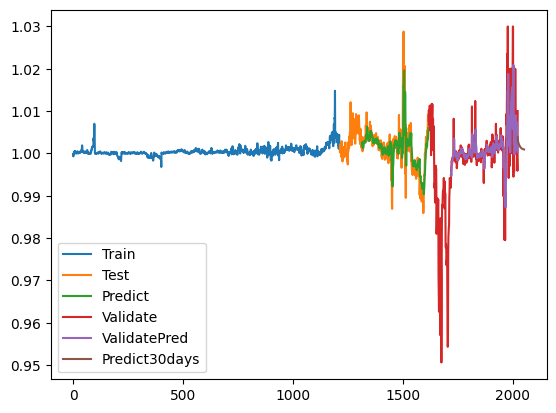

In [57]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()